### Installs if necessary

In [2]:
#install 
#! pip install pandas
#! pip install numpy
#! pip install wordcloud
#! pip install matplotlib
#! pip install regex
#! pip install plotly 
#! pip install spacy
#! pip install gensim
#! pip install nltk
! pip install afinn

'pip' is not recognized as an internal or external command,
operable program or batch file.


### Imports

In [3]:
# imports
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import string
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from afinn import Afinn
# BeautifulSoup is used to remove html tags from the text
from bs4 import BeautifulSoup 
import re # For regular expressions

C:\Users\30842\miniconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\30842\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading the CSV file's in

In [4]:
#bj_lo = pd.read_csv("/Users/paulademacker/Documents/GitHub/Capstone/bj_location_overview_all.csv",index_col=0)
#bj_r = pd.read_csv("/Users/paulademacker/Documents/GitHub/Capstone/bj_reviews_all.csv",index_col=0)
bj_lo = pd.read_csv("bj_location_overview_all.csv",index_col=0)
bj_r =pd.read_csv("bj_reviews_all.csv",index_col=0)
bj_lo = pd.DataFrame(bj_lo)
bj_r = pd.DataFrame(bj_r)

### Cleaning
Let's start with the location overview dataframe

Cleaning we did (saved results in csv, so we do not need to run the code every time):  
bj_r = bj_r.drop(columns = ["Unnamed: 0.1"]). 

#cleaning the star rating into numerical variable  
test_list= bj_r["star rating"]  
res = list(map(lambda sub:int(''.join(
      [ele for ele in sub if ele.isnumeric()])), test_list))
str(res)
bj_r["star rating"]= res
bj_r.head()


bj_r.location_code = bj_r.location_code.astype(int)

bj_r.to_csv(r'/Users/paulademacker/Documents/GitHub/Capstone/bj_reviews_all.csv')




In [5]:
bj_lo.shape

(200, 3)

In [6]:
bj_lo.location_code = bj_lo.location_code.astype(int)

In [7]:
bj_lo.head()

,reviews count,location,location_code
average rating,,,
4.2,356,"278 Middlesex Ave, Medford, MA 02155",1
3.9,202,"1440 Central Ave, Albany, NY 12205",2
4.1,460,"300 NJ-17, East Rutherford, NJ 07073",3
4.4,156,"6924 Frank Ave NW, North Canton, OH 44720",4
4.0,139,"4000 Nesconset Highway, NY-347, Setauket- East...",5


In [8]:
bj_r.shape

(41894, 5)

In [9]:
bj_r.head()

,star rating,name,review,date,location_code
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1


Converting the date column in approx. dates.  
Webscraping date: April 14th 2021  
Conversion as follows:  
x hours ago -> April 14th  
x days ago -> April 14th 2021 - x days
x weeks ago -> April 14th 2021 - x weeks (month)  
x months ago -> April 2021 - x months  
x years ago -> 2021 - x years ago  

In [10]:
# getting a list of the unique values in the date column to replace it later
bj_date = bj_r['date'].unique()
bj_date = list(bj_date)

#replace December 2020?
# creating a list with the values to replace the olf date column
bj_replace_date = ["March 2021", "October 2020", "February 2021", "September 2020", "December 2020", "November 2020", "June 2020", "January 2021", "July 2020", "May 2020", "2020", "2019", "2018", "2013", "2016", "2017", "2014", "August 2020", "2015", "April 2021", "April 2021", "2012", "March 2021", "April 8, 2021", "April 14, 2021", "April 10, 2021", "March 2021", "April 14, 2021", "April 9, 2021", "April 14, 2021", "April 13, 2021", "2011", "April 12, 2021", "April 14, 2021", "April 11, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021", "April 14, 2021"]

In [11]:
# replacing the date column
#bj_r = bj_r.replace(bj_date, bj_replace_date)

In [12]:
bj_r.head()

,star rating,name,review,date,location_code
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1


In [13]:
# dropping all columns without a review text 
bj_r_text = bj_r.dropna()
bj_r_text

,star rating,name,review,date,location_code
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1
...,...,...,...,...,...
41848,4,brian secord,Easy in and out,2018-01-01,200
41849,5,Sharron Bugbee,Wonderful as usual!!!,2018-01-01,200
41850,1,William Lanski,Out of stock on several items I purchase.,2018-01-01,200
41851,5,Diana Laframboise,I love this place,2018-01-01,200


In [14]:
# bj_r.loc[bj_r['name'] == re.compile('(?:^|\W)Translated(?:$|\W)')
sub = "Translated"
bj_r_text["dif_lang"] = bj_r_text["review"].str.find(sub)
bj_r_text

,star rating,name,review,date,location_code,dif_lang
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1,-1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1,-1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1,-1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1,-1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1
...,...,...,...,...,...,...
41848,4,brian secord,Easy in and out,2018-01-01,200,-1
41849,5,Sharron Bugbee,Wonderful as usual!!!,2018-01-01,200,-1
41850,1,William Lanski,Out of stock on several items I purchase.,2018-01-01,200,-1
41851,5,Diana Laframboise,I love this place,2018-01-01,200,-1


In [15]:
bj_r_text[bj_r_text["dif_lang"] == 1]

,star rating,name,review,date,location_code,dif_lang
125,5,TANIA PRADO,(Translated by Google) Very good place where y...,2020-01-01,1,1
126,5,khaled alahmad,(Translated by Google) A very huge store that ...,2018-01-01,1,1
127,5,Myriam Carreño,(Translated by Google) It is a good supermarke...,2018-01-01,1,1
128,5,Claribel Martinez,(Translated by Google) Because you find a vari...,2019-01-01,1,1
129,5,Jose Paniagua,(Translated by Google) BJ's is a good place wh...,2018-01-01,1,1
...,...,...,...,...,...,...
41689,5,Vick100,(Translated by Google) Very good place to do y...,2020-01-01,199,1
41690,5,Dias Garcia,(Translated by Google) I love my children💖\r\n...,2018-01-01,199,1
41691,5,William Recinos,(Translated by Google) I find what I want and ...,2017-01-01,199,1
41692,5,jose vasquez,(Translated by Google) To make purchases in qu...,2017-01-01,199,1


In [16]:
# creating dataframe with all non english reviews
bj_r_diff_lang = bj_r_text[bj_r_text["dif_lang"] == 1]
bj_r_diff_lang.shape

(1356, 6)

In [17]:
# creating dataframe with only english reviews
bj_r_text_eng = bj_r_text[bj_r_text["dif_lang"] == -1]
bj_r_text_eng.shape

(21200, 6)

In [18]:
bj_r_diff_lang.head()

,star rating,name,review,date,location_code,dif_lang
125,5,TANIA PRADO,(Translated by Google) Very good place where y...,2020-01-01,1,1
126,5,khaled alahmad,(Translated by Google) A very huge store that ...,2018-01-01,1,1
127,5,Myriam Carreño,(Translated by Google) It is a good supermarke...,2018-01-01,1,1
128,5,Claribel Martinez,(Translated by Google) Because you find a vari...,2019-01-01,1,1
129,5,Jose Paniagua,(Translated by Google) BJ's is a good place wh...,2018-01-01,1,1


A file with clean reviews. We splitted the reviews and saved the English (Translated) as well as the Original one. Only issue: We don't know how to delete paranthesis.

In [19]:
#bj_r_diff_lang_clean = pd.read_csv("/Users/paulademacker/Documents/GitHub/Capstone/review_foreign_languages")
#bj_r_diff_lang_clean
bj_r_diff_lang_clean = pd.read_csv("review_foreign_languages",index_col=0)
bj_r_diff_lang_clean

,name,date,location_code,English,Original
star rating,,,,,
5,TANIA PRADO,2020,1,) Very good place where you can buy several pr...,)\r\nMuy buen …
5,khaled alahmad,2018,1,) A very huge store that contains discounts an...,NaN
5,Myriam Carreño,2018,1,) It is a good supermarket; that it has a wide...,)\r\nEs un buen supermercado; que tiene surtid...
5,Claribel Martinez,2019,1,) Because you find a variety of products and t...,)\r\nXq encuentras variedad de productos y la ...
5,Jose Paniagua,2018,1,) BJ's is a good place where you can find good...,)\r\nBJ's es un buen lugar donde se encuentra ...
...,...,...,...,...,...
5,Vick100,2020,199,) Very good place to do your shopping .. it ha...,)\r\nMuy buen lugar para hacer tus compras ..t...
5,Dias Garcia,2018,199,) I love my children💖\r\n\r\n(,)\r\nAmo mis hijos💖
5,William Recinos,2017,199,) I find what I want and economic wholesale .....,)\r\nEncuentro por mayor lo que quiero y econó...


In [20]:
#creating a column with the translates text and one with the original text
#bj_r_diff_lang[['Translated','Original']] = 
#bj_r_diff_lang[['English','drop3','Original']] = bj_r_diff_lang.Original.str.split(")",expand=True)
#bj_r_diff_lang = bj_r_diff_lang.drop(columns=["review"])
#bj_r_diff_lang.to_csv("/Users/paulademacker/Documents/GitHub/Capstone/review_foreign_languages",index=False)


In [21]:
# extracting first and last name and date
# all upper case
# removing punctuation and numbers
#names = bj_r[["name", "date", "star rating", "location_code"]]
#names['name'] = names['name'].str.upper()
#names["name"] = names['name'].str.replace('[^\w\s]','')
#names["name"] = names['name'].str.replace('\d+', '')
#a = names.name.str.split(" ", expand = True)
#a = a.drop(columns = [2,3,4,5,6,7,8,9])

#names["first"] = a[0]
#names["last"] = a[1]
#names.drop(columns="name")

#names = pd.concat([names, bj_lo], axis=1)
#names.drop(columns=["average rating","reviews count","popular words","location_code"])

#names.to_csv("/Users/paulademacker/Documents/GitHub/Capstone/names_all_reviews.csv",index=False)

# EDA 

Dataframe explanation:  
bj_lo - > all 200 locations  
bj_r -> all reviews  
bj_r_text -> only text reviews, all languages  
bj_r_diff_lang -> only text reviews in foreign languages  
bj_r_text_eng -> only text reviews in English  


### How many reviews do not have a text?

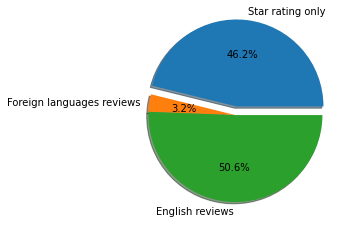

In [22]:
no_text = len(bj_r['review']) - len(bj_r_text['review'])
with_text_translated = len(bj_r_diff_lang['review'])
with_text_English = len(bj_r_text_eng['review'])

y = np.array([no_text,with_text_translated,with_text_English])
explode = (0.1,0,0)
plt.rcParams['font.size'] = 20
mylabels = ["Star rating only", "Foreign languages reviews","English reviews"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%', explode = explode, shadow = True, textprops={'fontsize': 10}
)
plt.show()


We used the bj_r dataset for this part.
46.2% of the reviews are star rating only (do not have text).
50.6% of the reviews are in English.
3.2% of the reviews are in foreign languages and translated by Google.

### Distribution of all star ratings for only text reviews in English

In [23]:
# need upgrade nbformat by pip install --upgrade nbformat and restart VScode

ratings = bj_r_text_eng['star rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink','lightblue','aqua','gold','crimson']

rating_piechart = go.Pie(labels = label_rating, values = size_rating, marker = dict(colors = colors), name = "Bj's", hole = 0.3, textfont_size=20)

df = [rating_piechart]
layout = go.Layout(title="Distribution of Ratings for Bj's Wholesale")
fig = go.Figure(data = df, layout = layout)
fig

We used the dataset with only English reviews.
Almost half of the reviews are rated as 5 stars.
But there are almost 23.5% of the reviews are rated as 1 or 2 stars, which is very low.

### Distribution of star ratings for no text review

In [24]:
bj_r_notext = bj_r[bj_r.isnull().any(axis=1)]

ratings_notext = bj_r_notext['star rating'].value_counts()

label_rating_notext = ratings_notext.index
size_rating_notext = ratings_notext.values

colors = ['pink','lightblue','aqua','gold','crimson']

rating_piechart_notext = go.Pie(labels = label_rating_notext, values = size_rating_notext, marker = dict(colors = colors), name = "Bj's", hole = 0.3,textfont_size=20)

df_notext = [rating_piechart_notext]
layout_notext = go.Layout(title="Distribution of Ratings for no text reviews")
fig_notext = go.Figure(data = df_notext, layout = layout_notext)
fig_notext

We checked on the data with only star ratings (no text).
Most of the ratings are high, with more than half of them rated as 5 stars.
The low star ratings don't exceed 10%.
We can suggest that those customers who do not leave any text reviews are more intended to leave high star ratings.

### Overall star ratings overtime 

In [25]:
bj_r_text_eng['date'] = pd.to_datetime(bj_r_text_eng['date'])

In [26]:
bj_r_text_eng.head()

,star rating,name,review,date,location_code,dif_lang
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1,-1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1,-1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1,-1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1,-1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1


In [27]:
reviews_groupby_date = bj_r_text_eng.groupby(['date'])['star rating'].mean()
reviews_groupby_date = pd.DataFrame(data = reviews_groupby_date)
reviews_groupby_date.reset_index(inplace=True)

reviews_groupby_date= reviews_groupby_date[0:9]
reviews_groupby_date

,date,star rating
0,2011-01-01,3.111111
1,2012-01-01,3.941176
2,2013-01-01,3.644737
3,2014-01-01,3.450450
4,2015-01-01,3.603175
5,2016-01-01,3.889581
6,2017-01-01,3.759417
7,2018-01-01,4.115481
8,2019-01-01,3.646780


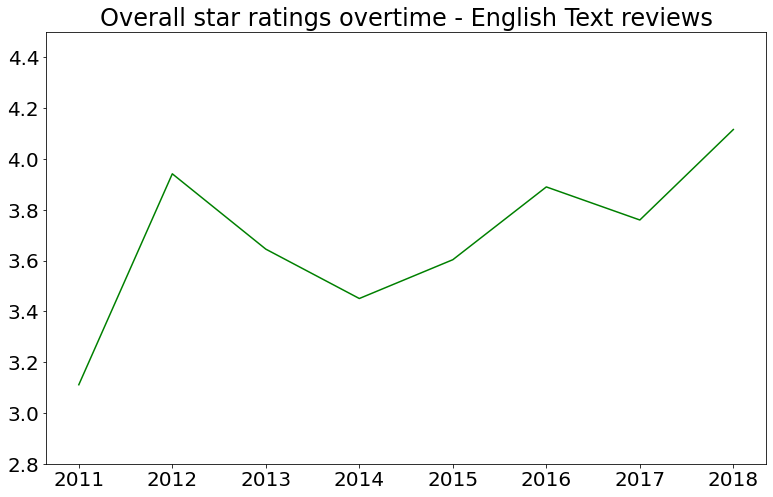

In [28]:
bj_r_text_eng['date'] = pd.to_datetime(bj_r_text_eng['date'])
bj_r_text_eng['year'] = bj_r_text_eng['date'].dt.year
#sorted_reviews = reviews_groupby_date.sort_values('date',ascending=False)
#date_unique = bj_r_text_eng['date'].unique()
reviews_groupby_date = bj_r_text_eng.groupby(['year'])['star rating'].mean()
reviews_groupby_date = pd.DataFrame(data = reviews_groupby_date)
reviews_groupby_date.reset_index(inplace=True)
reviews_groupby_date= reviews_groupby_date[0:8]
fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_axes([0,0,1,1])

ax1.set_title('Overall star ratings overtime - English Text reviews')

ax1.plot(reviews_groupby_date['year'],reviews_groupby_date['star rating'],color='green')
ax1.set_ylim([2.8, 4.5])
plt.rc('font', size= 10)
plt.show()

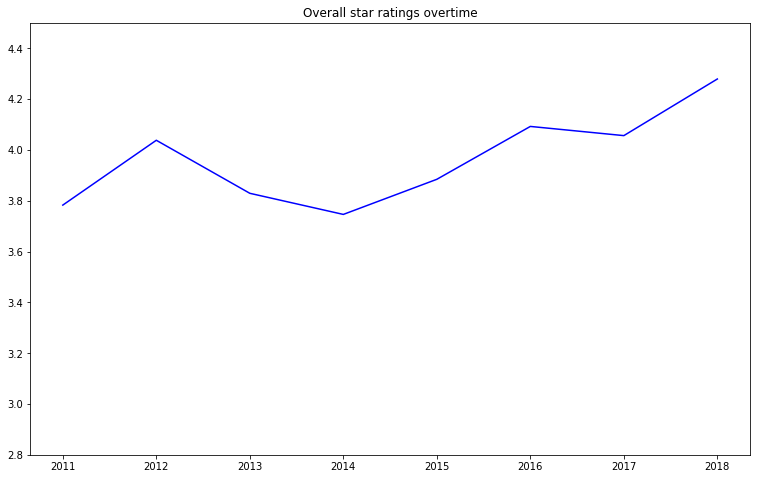

In [29]:
# same graph as above just with all reviews, text and star onyl

bj_r['date'] = pd.to_datetime(bj_r['date'])
bj_r['year'] = bj_r['date'].dt.year
all_reviews_groupby_date = bj_r.groupby(['year'])['star rating'].mean()
all_reviews_groupby_date = pd.DataFrame(data = all_reviews_groupby_date)

#all_reviews_groupby_date.groupby(all_reviews_groupby_date['date'].map(lambda x: x.year))
all_reviews_groupby_date.reset_index(inplace=True)
all_reviews_groupby_date= all_reviews_groupby_date[0:8]
#date_unique = bj_r['date'].unique()

fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_axes([0,0,1,1])

ax1.set_title('Overall star ratings overtime')
ax1.plot(all_reviews_groupby_date['year'],all_reviews_groupby_date['star rating'],color='blue')
ax1.set_ylim([2.8, 4.5])

plt.show()

In [30]:
bj_r_notext['date'] = pd.to_datetime(bj_r_notext['date'])
bj_r_notext['year'] = bj_r_notext['date'].dt.year
star_only_reviews_groupby_date = bj_r_notext.groupby(['year'])['star rating'].mean()
star_only_reviews_groupby_date = pd.DataFrame(data = star_only_reviews_groupby_date)

#all_reviews_groupby_date.groupby(all_reviews_groupby_date['date'].map(lambda x: x.year))
star_only_reviews_groupby_date.reset_index(inplace=True)
star_only_reviews_groupby_date= star_only_reviews_groupby_date[0:8]
star_only_reviews_groupby_date

,year,star rating
0,2011,4.214286
1,2012,4.085714
2,2013,4.270270
3,2014,4.225352
4,2015,4.372093
5,2016,4.294333
6,2017,4.308475
7,2018,4.411063


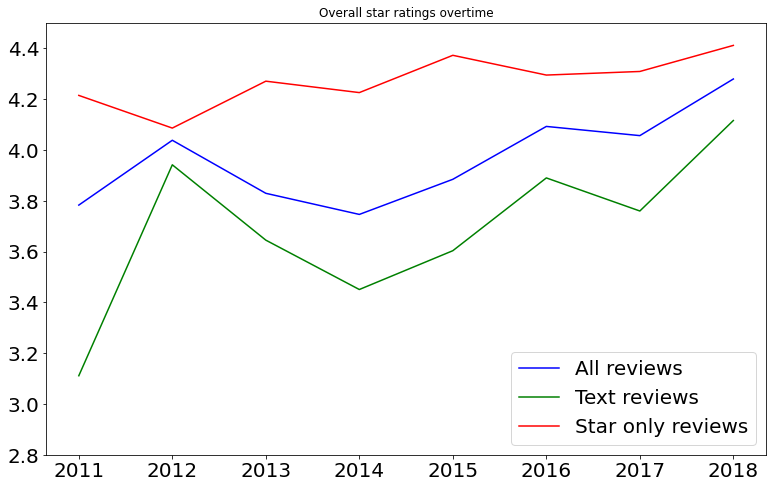

In [31]:
# same graph as above just with all reviews, text and star onyl

bj_r['date'] = pd.to_datetime(bj_r['date'])
bj_r['year'] = bj_r['date'].dt.year
all_reviews_groupby_date = bj_r.groupby(['year'])['star rating'].mean()
all_reviews_groupby_date = pd.DataFrame(data = all_reviews_groupby_date)

#all_reviews_groupby_date.groupby(all_reviews_groupby_date['date'].map(lambda x: x.year))
all_reviews_groupby_date.reset_index(inplace=True)
all_reviews_groupby_date= all_reviews_groupby_date[0:8]
#date_unique = bj_r['date'].unique()


fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_axes([0,0,1,1])

ax1.set_title('Overall star ratings overtime')
line1, = ax1.plot(reviews_groupby_date['year'],reviews_groupby_date['star rating'],color='green')
line2, = ax1.plot(all_reviews_groupby_date['year'],all_reviews_groupby_date['star rating'],color='blue')
line3, = ax1.plot(star_only_reviews_groupby_date['year'],star_only_reviews_groupby_date['star rating'],color='red')
ax1.set_ylim([2.8, 4.5])
ax1.legend([line2, line1, line3],["All reviews", "Text reviews", "Star only reviews"],fontsize= 20)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(20)
plt.show()

We used the dataset with all English reviews.
We can tell from the graph that the ratings before 2018 fluctuates above 3 stars with a peak around year 2018 at 4 stars. Starting from 2018, the star rating of bj stores according to English speaking customers greatly reduces.

### Distribution of Ratings in Bj's Wholesale

In [32]:
results= pd.merge(bj_lo, bj_r_text_eng, on = "location_code")
results.head()


,reviews count,location,location_code,star rating,name,review,date,dif_lang,year
0,356,"278 Middlesex Ave, Medford, MA 02155",1,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,-1,2021
1,356,"278 Middlesex Ave, Medford, MA 02155",1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,-1,2020
2,356,"278 Middlesex Ave, Medford, MA 02155",1,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,-1,2021
3,356,"278 Middlesex Ave, Medford, MA 02155",1,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,-1,2021
4,356,"278 Middlesex Ave, Medford, MA 02155",1,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,-1,2021


In [33]:
results_rating= results.groupby("location_code")["star rating"].mean().sort_values()

rating_bottom_10 = results_rating[0:10] 

rating_Top_10 = results_rating[-10:]


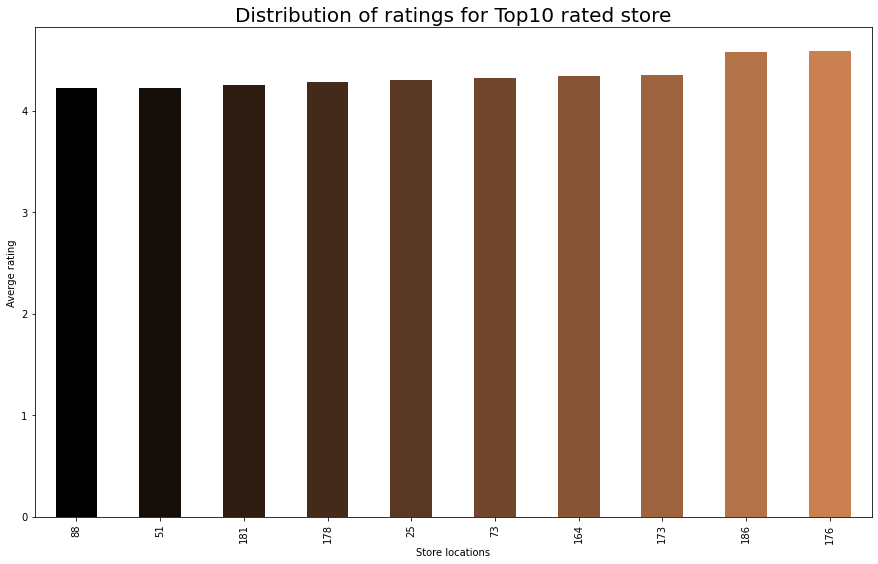

In [34]:
color = plt.cm.copper(np.linspace(0,1,15))
rating_Top_10.plot.bar(color = color,figsize = (15,9))

plt.title('Distribution of ratings for Top10 rated store',fontsize=20)
plt.xlabel('Store locations')
plt.ylabel('Averge rating')
plt.show()


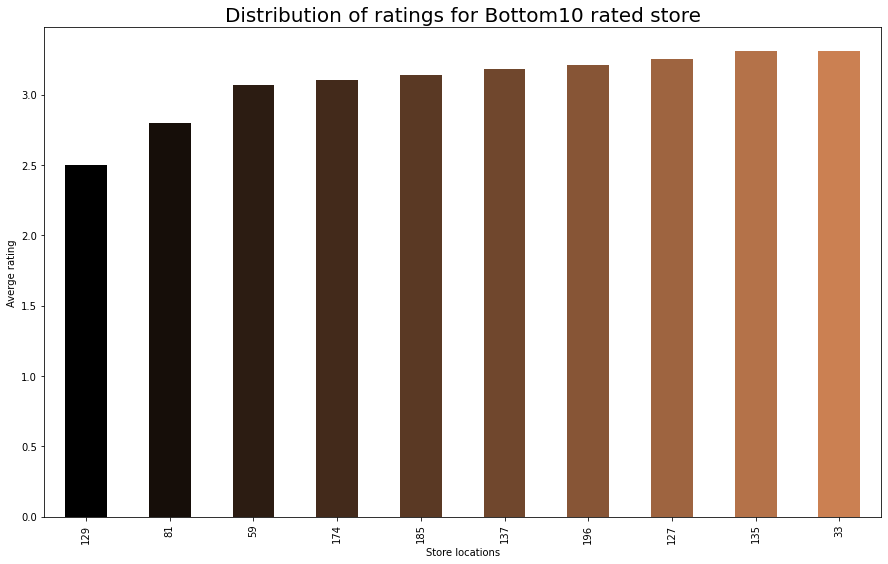

In [35]:
color = plt.cm.copper(np.linspace(0,1,15))
rating_bottom_10.plot.bar(color = color,figsize = (15,9))

plt.title('Distribution of ratings for Bottom10 rated store',fontsize=20)
plt.xlabel('Store locations')
plt.ylabel('Averge rating')
plt.show()

We merged the bj English reviews dataset with the bj store location information dataset to the find the top 10 and bottom 10 rating stores. The highest rated store is bj wholesale at 1899 Cinema Dr, Olean, NY 14760. The lowest rated store is bj wholesale at 1929 NE Pine Island Rd, Cape Coral, FL 33909.


### Do people write longer or shorter reviews and are those positive or negative?


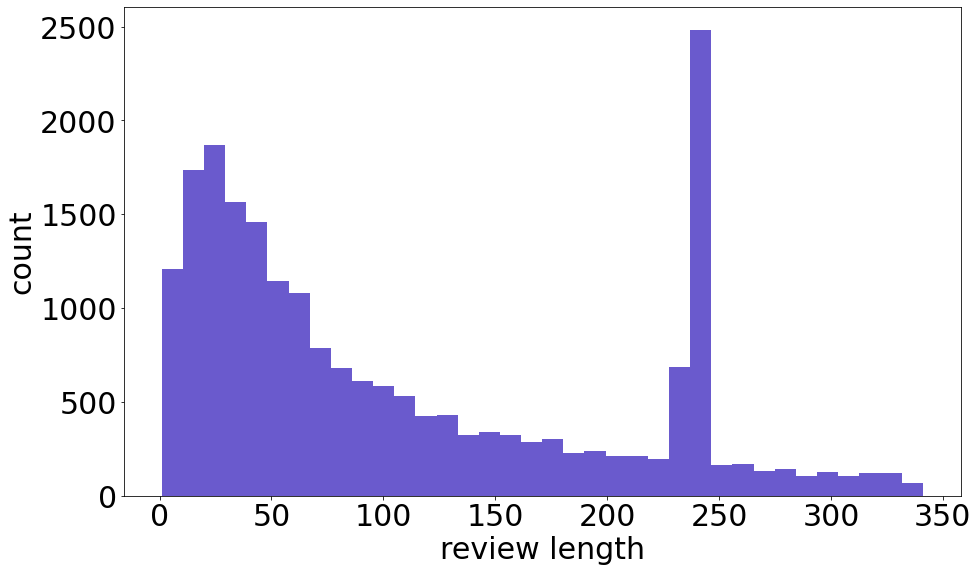

In [36]:
# Distribution of review length
bj_r_text_eng['length'] =  bj_r_text_eng['review'].apply(len)
bj_r_text_eng

#fig1= sns.distplot(bj_r_text_eng['length'], hist=True, 
             #bins=int(180/5), color = 'darkblue', 
             #hist_kws={'edgecolor':'black'})
plt.figure(figsize= (15,9))
plt.hist(bj_r_text_eng['length'], bins= int(180/5), color = 'slateblue')


plt.xlabel('review length', fontsize= 30)
plt.ylabel('count', fontsize= 30)
plt.tick_params(axis='both', labelsize=30)


We used the dataset with only English reviews.
It can be told that most customers prefer to writing reviews less than 100 characters.

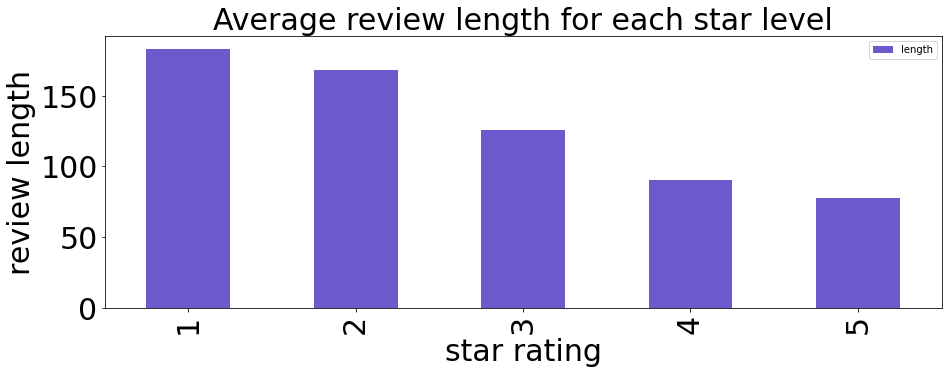

In [37]:
# Averge reviews length for each star rating level.

groupby_stars = bj_r_text_eng.groupby(['star rating'])['length'].mean()
groupby_stars = pd.DataFrame(data = groupby_stars)

fig= groupby_stars.plot.bar(color='slateblue',figsize = (15,5))
plt.rcParams['font.size'] = 20
plt.title('Average review length for each star level',fontsize = 30)
plt.xlabel('star rating', fontsize= 30)
plt.ylabel('review length', fontsize= 30)
for label in (fig.get_xticklabels() + fig.get_yticklabels()):
	label.set_fontsize(30)
plt.show()


It can be inferred from this graph that those who leave low star ratings write more text when they are leaving reviews.

#Stopwords 
### In the following step we are gonna remove the punction,do tokenization and remove the stop words. We creat three new column which are review_punct, review_tokenized, and review_nonstop.
### Next, we will use the review_nonstop column to find the most common words and try to remove additional words which doesn't meaningful for our analysis. The top 20 most common words are: bjs, place, store, good, prices, great, service, always, shopping, customer, staff, shop, get, selection, items, bulk, friendly, clean, everything, and one. Then we move words: "i","always","shop","place","store","get","good","great","love","everything","like","bjs","one","lot","best","go","nice","went","people","really","need","bj","buy","dont","thing", and "today" and created a new column which called review_nonsense.

In [38]:
bj_r_text_eng["review"] = bj_r_text_eng["review"].str.lower()

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

bj_r_text_eng['review_punct'] = bj_r_text_eng['review'].apply(lambda x: remove_punct(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,233,this location has been my reliable goto for ma...
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...
4,1,Donnie L.S,do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1,2021,107,do something\r\nmake a self checkout line othe...


In [41]:
# then we do tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

bj_r_text_eng['review_tokenized'] = bj_r_text_eng['review_punct'].apply(lambda x: tokenization(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told..."
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...,"[not, ample, stock, compare, to, other, stores..."
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,233,this location has been my reliable goto for ma...,"[this, location, has, been, my, reliable, goto..."
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...,"[i, place, a, online, pick, up, order, to, sav..."
4,1,Donnie L.S,do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1,2021,107,do something\r\nmake a self checkout line othe...,"[do, something, make, a, self, checkout, line,..."


In [42]:
stopword = nltk.corpus.stopwords.words('english')

In [43]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
bj_r_text_eng['review_nonstop'] = bj_r_text_eng['review_tokenized'].apply(lambda x: remove_stopwords(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told...","[eric, great, customer, service, told, use, re..."
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...,"[not, ample, stock, compare, to, other, stores...","[ample, stock, compare, stores, everything, go..."
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,233,this location has been my reliable goto for ma...,"[this, location, has, been, my, reliable, goto...","[location, reliable, goto, many, years, howeve..."
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...,"[i, place, a, online, pick, up, order, to, sav...","[place, online, pick, order, save, time, every..."
4,1,Donnie L.S,do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1,2021,107,do something\r\nmake a self checkout line othe...,"[do, something, make, a, self, checkout, line,...","[something, make, self, checkout, line, bj, ma..."


In [44]:
bj_r_text_review = bj_r_text_eng['review_nonstop']
#bj_r_text_review = bj_r_text_review.to_string().split(",")
#bj_r_text_review

In [45]:
# converting a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

In [46]:
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
nltk.download('popular')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\30842\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\30842\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\30842\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\30842\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\30842\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [47]:
# spliting a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

In [48]:
sentences = []
print("Parsing sentences from training set")
for review in bj_r_text["review"]:
    sentences += review_sentences(review, tokenizer)
bj_r_text_splitted= sentences

Parsing sentences from training set


C:\Users\30842\miniconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning:

"." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.

C:\Users\30842\miniconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning:

".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.

C:\Users\30842\miniconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning:

"Con:
1." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.



In [49]:
bj_r_text_splitted[0:5]

[['eric', 'has', 'great', 'customer', 'service'],
 ['he',
  'told',
  'me',
  'to',
  'use',
  'the',
  'receipt',
  'and',
  'left',
  'instructions',
  'on',
  'it'],
 ['but', 'i', 'lost', 'it'],
 ['it',
  'was',
  'a',
  'good',
  'shopping',
  'run',
  'and',
  'he',
  'made',
  'the',
  'experience',
  'even',
  'better'],
 ['way', 'to', 'go', 'eric']]

In [50]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(bj_r_text_splitted)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')


OK. The 20 most common words are as follows



TypeError: unhashable type: 'list'

In [51]:
non_sense_word = ["i","always","shop","place","store","get","good","great","love","everything","like","bjs","one","lot","best","go","nice","went","people","really","need","bj","buy","dont","thing","today"]

In [52]:
#bj_r_text_eng['review_nonsense'] = bj_r_text_eng['review'].str.replace('|'.join(map(re.escape, non_sense_word)), '')
#bj_r_text_eng

In [53]:
def remove_nonsense(text):
    text = [word for word in text if word not in non_sense_word]
    return text
    
bj_r_text_eng['review_nonsense'] = bj_r_text_eng['review_nonstop'].apply(lambda x: remove_nonsense(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told...","[eric, great, customer, service, told, use, re...","[eric, customer, service, told, use, receipt, ..."
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...,"[not, ample, stock, compare, to, other, stores...","[ample, stock, compare, stores, everything, go...","[ample, stock, compare, stores, parking, spaces]"
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,233,this location has been my reliable goto for ma...,"[this, location, has, been, my, reliable, goto...","[location, reliable, goto, many, years, howeve...","[location, reliable, goto, many, years, howeve..."
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...,"[i, place, a, online, pick, up, order, to, sav...","[place, online, pick, order, save, time, every...","[online, pick, order, save, time, everytime, p..."
4,1,Donnie L.S,do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1,2021,107,do something\r\nmake a self checkout line othe...,"[do, something, make, a, self, checkout, line,...","[something, make, self, checkout, line, bj, ma...","[something, make, self, checkout, line, manage..."


# Topic Analysis
### To identify initial topics discussed in the reviews, we decided to display the 20 most frequently mentioned words in a word cloud. We removed additional adjectives in addition to the already eliminated stop words. By doing so, we only mapped nouns that indicate a specific area of BJ's, such as "price","service", "customer", "shopping", "coupon", "selection", "product", "item", "clean", "location", "time", "deal", "staff", "line", "cashier", "food", "experience", "bulk", "employee".

### We also find out the top three most common topics that people are giving reviews for are “price”, “customer”, and “service”. In order to see if people are giving positive or negative feedback for those three topics, we use plt to draw a histogram for each topic. From the graph below, we can see that when people are talking about price, most of the time they give 5 starts. However, people are doing an opposite way for topic customer, they usually leave 1 star when they talking about topic customer. And for topic service, people mostly are giving 1 star and 5 stars, it is equally distributed between 1 and 5.




In [54]:
word_cloud = bj_r_text_eng['review_nonsense']
word_cloud = word_cloud.dropna()
#word_cloud = word_cloud.values.tolist()

In [55]:
# Function to convert  
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1

In [56]:
#word_cloud = listToString(word_cloud)
word_cloud = word_cloud.to_string()

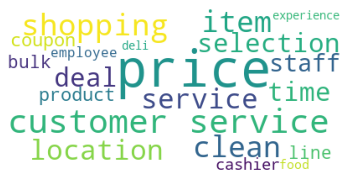

In [57]:
# word cloud with the most used words

wc = WordCloud(background_color = 'white',max_words = 20)
wordcloud = wc.generate(word_cloud)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [58]:
bj_r_text_eng['topic_price'] = bj_r_text_eng['review'].str.contains('price')

In [59]:
price = bj_r_text_eng.loc[bj_r_text_eng['topic_price'] == True]
price.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense,topic_price
10,5,Melanie Russo,"this location has been so careful,clean& doing...",2020-06-01,1,-1,2020,270,this location has been so carefulclean doing e...,"[this, location, has, been, so, carefulclean, ...","[location, carefulclean, everything, make, gue...","[location, carefulclean, make, guests, feel, s...",True
22,4,James Craver,i enjoy bj's wholesale club for its variety an...,2019-01-01,1,-1,2019,237,i enjoy bjs wholesale club for its variety and...,"[i, enjoy, bjs, wholesale, club, for, its, var...","[enjoy, bjs, wholesale, club, variety, price, ...","[enjoy, wholesale, club, variety, price, compl...",True
24,2,Jeanne Walsh,prices are the same in the grocery store or bj...,2019-01-01,1,-1,2019,223,prices are the same in the grocery store or bj...,"[prices, are, the, same, in, the, grocery, sto...","[prices, grocery, store, bjs, higher, one, flo...","[prices, grocery, higher, floor, assist, sure,...",True
32,5,Fernando Franco Cuadrado,great prices for a lot of things but watch for...,2020-01-01,1,-1,2020,243,great prices for a lot of things but watch for...,"[great, prices, for, a, lot, of, things, but, ...","[great, prices, lot, things, watch, items, may...","[prices, things, watch, items, may, end, costi...",True
34,4,Rich Marino,"selection limited, large quantities but good p...",2018-01-01,1,-1,2018,239,selection limited large quantities but good pr...,"[selection, limited, large, quantities, but, g...","[selection, limited, large, quantities, good, ...","[selection, limited, large, quantities, prices...",True


Text(0, 0.5, 'Number Of Reviews')

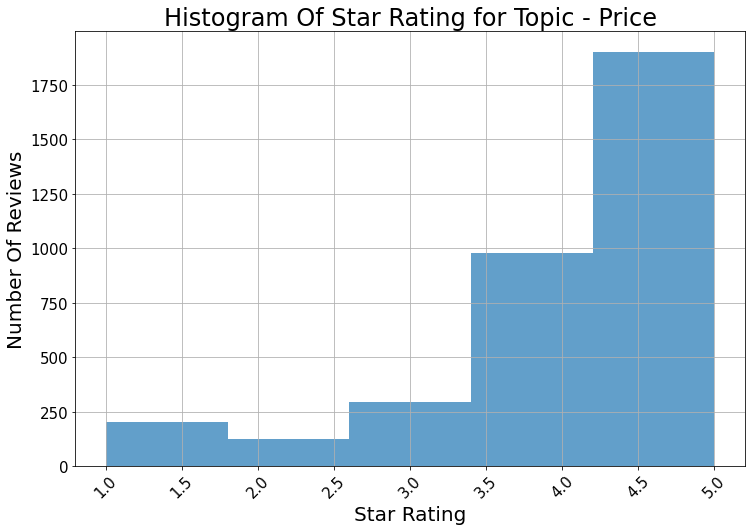

In [60]:
price['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Price',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [61]:
bj_r_text_eng['topic_lines'] = bj_r_text_eng['review'].str.contains('lines')

In [62]:
lines = bj_r_text_eng.loc[bj_r_text_eng['topic_lines'] == True]
lines.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense,topic_price,topic_lines
26,1,Domenic Camarra,"in a word...""dishartning"".\r\nwith hundreds of...",2018-01-01,1,-1,2018,241,in a worddishartning\r\nwith hundreds of shopp...,"[in, a, worddishartning, with, hundreds, of, s...","[worddishartning, hundreds, shopping, customer...","[worddishartning, hundreds, shopping, customer...",False,True
32,5,Fernando Franco Cuadrado,great prices for a lot of things but watch for...,2020-01-01,1,-1,2020,243,great prices for a lot of things but watch for...,"[great, prices, for, a, lot, of, things, but, ...","[great, prices, lot, things, watch, items, may...","[prices, things, watch, items, may, end, costi...",True,True
49,3,Christine P,easy parking. the lines are always ridiculous!...,2018-01-01,1,-1,2018,85,easy parking the lines are always ridiculous g...,"[easy, parking, the, lines, are, always, ridic...","[easy, parking, lines, always, ridiculous, go,...","[easy, parking, lines, ridiculous, waltham, lo...",False,True
61,4,ThePhilLorenzo,i went in at 4:30 p.m. on the monday before ch...,2018-01-01,1,-1,2018,107,i went in at pm on the monday before christma...,"[i, went, in, at, pm, on, the, monday, before,...","[went, pm, monday, christmas, place, surprisin...","[pm, monday, christmas, surprisingly, empty, l...",False,True
65,3,Shawn Cummings,the 1st bjs. great selection but the lines ar...,2019-01-01,1,-1,2019,55,the st bjs great selection but the lines are ...,"[the, st, bjs, great, selection, but, the, lin...","[st, bjs, great, selection, lines, horrid]","[st, selection, lines, horrid]",False,True


In [63]:
bj_r_text_eng['topic_customer service'] = bj_r_text_eng['review'].str.contains('customer service')

In [64]:
customer_service = bj_r_text_eng.loc[bj_r_text_eng['topic_customer service'] == True]
customer_service.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense,topic_price,topic_lines,topic_customer service
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told...","[eric, great, customer, service, told, use, re...","[eric, customer, service, told, use, receipt, ...",False,False,True
9,1,pavana rai,"worse customer service, supervisor’s attitude ...",2020-11-01,1,-1,2020,157,worse customer service supervisor’s attitude w...,"[worse, customer, service, supervisor, s, atti...","[worse, customer, service, supervisor, attitud...","[worse, customer, service, supervisor, attitud...",False,False,True
36,1,Colleen Robichaud Mountzouros,extremely rude customer service.,2020-01-01,1,-1,2020,32,extremely rude customer service,"[extremely, rude, customer, service]","[extremely, rude, customer, service]","[extremely, rude, customer, service]",False,False,True
55,4,Love Diva,ok.. busy store great customer service,2018-01-01,1,-1,2018,38,ok busy store great customer service,"[ok, busy, store, great, customer, service]","[ok, busy, store, great, customer, service]","[ok, busy, customer, service]",False,False,True
60,4,vibert austin,"it was great, but need more customer service",2018-01-01,1,-1,2018,44,it was great but need more customer service,"[it, was, great, but, need, more, customer, se...","[great, need, customer, service]","[customer, service]",False,False,True


Text(0, 0.5, 'Number Of Reviews')

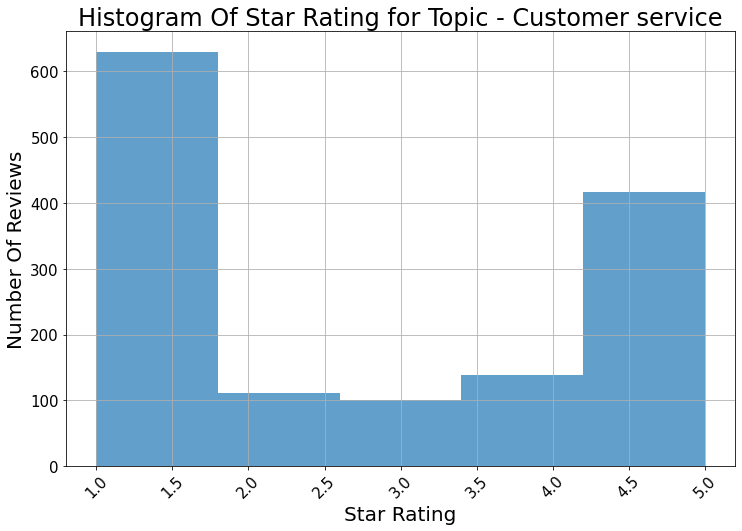

In [65]:
customer_service['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Customer service',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [66]:
bj_r_text_eng['topic_service'] = bj_r_text_eng['review'].str.contains('service')

In [67]:
service = bj_r_text_eng.loc[bj_r_text_eng['topic_service'] == True]
service.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense,topic_price,topic_lines,topic_customer service,topic_service
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told...","[eric, great, customer, service, told, use, re...","[eric, customer, service, told, use, receipt, ...",False,False,True,True
5,5,Jackie D,i'm a 15 years bj's member and got issues twic...,2020-09-01,1,-1,2020,214,im a years bjs member and got issues twice st...,"[im, a, years, bjs, member, and, got, issues, ...","[im, years, bjs, member, got, issues, twice, s...","[im, years, member, got, issues, twice, manage...",False,False,False,True
7,1,Aydin Alim,"very disappointed with the tire service, and m...",2020-10-01,1,-1,2020,243,very disappointed with the tire service and ma...,"[very, disappointed, with, the, tire, service,...","[disappointed, tire, service, manager, attitud...","[disappointed, tire, service, manager, attitud...",False,False,False,True
8,1,srkharel,i had appointment at 4pm on tax free weekend f...,2020-10-01,1,-1,2020,240,i had appointment at pm on tax free weekend fo...,"[i, had, appointment, at, pm, on, tax, free, w...","[appointment, pm, tax, free, weekend, tire, in...","[appointment, pm, tax, free, weekend, tire, in...",False,False,False,True
9,1,pavana rai,"worse customer service, supervisor’s attitude ...",2020-11-01,1,-1,2020,157,worse customer service supervisor’s attitude w...,"[worse, customer, service, supervisor, s, atti...","[worse, customer, service, supervisor, attitud...","[worse, customer, service, supervisor, attitud...",False,False,True,True


Text(0, 0.5, 'Number Of Reviews')

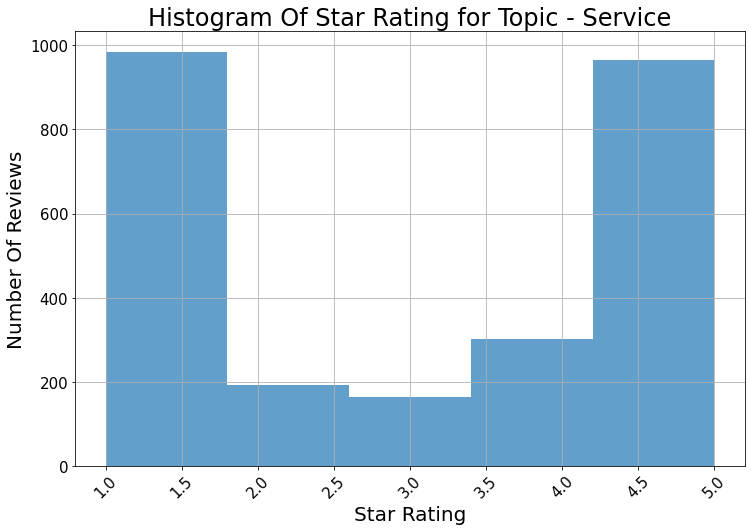

In [68]:
service['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Service',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

### Sentiment Analysis

In [79]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist,ConditionalFreqDist
import nltk.sentiment.sentiment_analyzer

In [80]:
#reviews_str =bj_r_text_eng["review_nonsense"].apply(lambda x:str(x))
reviews_str = bj_r_text_eng["review_nonsense"].to_string().split(",")
reviews_str 

['0        [eric',
 ' customer',
 ' service',
 ' told',
 ' use',
 ' receipt',
 ' ...\n1         [ample',
 ' stock',
 ' compare',
 ' stores',
 ' parking',
 ' spaces]\n2        [location',
 ' reliable',
 ' goto',
 ' many',
 ' years',
 ' howeve...\n3        [online',
 ' pick',
 ' order',
 ' save',
 ' time',
 ' everytime',
 ' p...\n4        [something',
 ' make',
 ' self',
 ' checkout',
 ' line',
 ' manage...\n5        [im',
 ' years',
 ' member',
 ' got',
 ' issues',
 ' twice',
 ' manage...\n6        [curbside',
 ' pickup',
 ' joke',
 ' waiting',
 ' something',
 ' c...\n7        [disappointed',
 ' tire',
 ' service',
 ' manager',
 ' attitud...\n8        [appointment',
 ' pm',
 ' tax',
 ' free',
 ' weekend',
 ' tire',
 ' in...\n9        [worse',
 ' customer',
 ' service',
 ' supervisor',
 ' attitud...\n10       [location',
 ' carefulclean',
 ' make',
 ' guests',
 ' feel',
 ' s...\n11       [afternoon',
 ' uncle',
 ' waiting',
 ' line',
 ' ready',
 ' pay',
 ' ...\n12       [rude',
 ' teenag

In [81]:
# Using pair words as features
def bigram(words,score_fn=BigramAssocMeasures.chi_sq,n=13000):
    bigram_finder = BigramCollocationFinder.from_words(words) #Turn the text into a two-word pairing
    bigrams = bigram_finder.nbest(score_fn,n) 
    newBigrams = [u+v for (u,v) in bigrams]
    return bag_of_words(newBigrams)

pair_words = bigram(reviews_str,score_fn=BigramAssocMeasures.chi_sq,n=13000)


NameError: name 'bag_of_words' is not defined

In [ ]:
# # Using single word and double words together as features
# def  bigram_words(words,score_fn=BigramAssocMeasures.chi_sq,n=13000):
#      bigram_finder=BigramCollocationFinder.from_words(words)
#      bigrams = bigram_finder.nbest(score_fn,n)
#      newBigrams = [u+v for (u,v) in bigrams]
#      a = bag_of_words(words)
#      b = bag_of_words(newBigrams)
#      a = a + b  #combine a and b
#      return a 

# pair_sigle_words = print(bigram_words(reviews_str,score_fn=BigramAssocMeasures.chi_sq,n=13000))

In [82]:
from afinn import Afinn 
af = Afinn() 

# compute sentiment scores (polarity) and labels 
sentiment_scores = [af.score(word) for word in reviews_str] 
sentiment_category = ['positive' if score > 0 
                         else 'negative' if score < 0 
                             else 'neutral'  
                                for score in sentiment_scores] 
sentiment_category

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'ne

In [83]:
df = pd.DataFrame([list(reviews_str), sentiment_scores, sentiment_category]).T 
df.columns = ['reviews_str', 'sentiment_score', 'sentiment_category'] 
df['sentiment_score'] = df.sentiment_score.astype('float') 
df.groupby(by=['reviews_str'])
df

,reviews_str,sentiment_score,sentiment_category
0,0 [eric,0.0,neutral
1,customer,0.0,neutral
2,service,0.0,neutral
3,told,0.0,neutral
4,use,0.0,neutral
...,...,...,...
75270,purchase]\n41851 ...,0.0,neutral
75271,bulk,0.0,neutral
75272,shopping,0.0,neutral
75273,low,0.0,neutral


In [84]:
positive_words = df[df['sentiment_category'] =='positive']
negative_words = df[df['sentiment_category'] == 'negative']


In [85]:
positive_words.sort_values(ascending=False,by=['sentiment_score'],inplace = True)
positive_words.head(20)

,reviews_str,sentiment_score,sentiment_category
42559,money]\n24173 ...,13.0,positive
40586,excelled]\n23186 ...,13.0,positive
20222,carts]\n11722 ...,11.0,positive
40283,check]\n22956 ...,11.0,positive
42560,friendly]\n24178 ...,10.0,positive
39209,clean]\n22488 ...,10.0,positive
49388,others]\n27815 ...,9.0,positive
19299,...\n11298 ...,9.0,positive
59180,pleasure]\n32969 ...,8.0,positive
44452,quality]\n25180 ...,8.0,positive


In [86]:
negative_words.sort_values(ascending=True,by=['sentiment_score'],inplace = True)
negative_words.head(20)

,reviews_str,sentiment_score,sentiment_category
29817,inste...\n17297 ...,-9.0,negative
62408,bad]\n34351 [worst,-6.0,negative
10037,horrible]\n5924 ...,-6.0,negative
38837,suck]\n22398 [horrible,-6.0,negative
49181,m...\n27767 ...,-5.0,negative
64369,abused]\n35615 ...,-5.0,negative
8739,disrespect...\n5270 [worse,-5.0,negative
51501,stupid]\n29012 [worst,-5.0,negative
17565,ser]\n10258 ...,-5.0,negative
66562,alone]\n37047 [bad,-5.0,negative


### Ngrams

In [ ]:
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
data_vectorized = vectorizer.fit_transform(tqdm(all_texts))

In [ ]:
data_vectorized.shape

In [ ]:
# most frequent words
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]})

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

#### Find sentiment score for words by using the star rate

In [ ]:
#n-grams 
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

In [ ]:
# 2 n-grams
bigrams_series = (pd.Series(nltk.ngrams(bj_r_text_review
                       , 2)).value_counts())[:30]

# we can see that great prices, good prices and well stocked are often used together
# great palce, bulk items, everything need, long lines, friendly staff, good deals, store good, good selection, friendly, helpful, clean store

In [ ]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
trigrams_series =(pd.Series(nltk.ngrams(bj_r_text_review
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
(pd.Series(nltk.ngrams(bj_r_text_review
                       , 4)).value_counts())[:30]

In [ ]:
(pd.Series(nltk.ngrams(bj_r_text_review
                       , 5)).value_counts())[:30]

### Word2vec

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(bj_r_text_splitted, vector_size= num_features, workers=num_workers,min_count=min_word_count, window=context, sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300feat_40minwords_10context"
model.save(model_name)

In [ ]:
# Few tests: This will print the odd word among them 
model.wv.doesnt_match("service people good poor".split())

In [ ]:
# print the most similar words present in the model
model.wv.most_similar("price")

In [ ]:
model.wv.most_similar("service")

In [ ]:
model.wv.most_similar("bad")

In [ ]:
#vocab lenth
len(model.wv)

### Deeper Setiment Analysis

Lines

In [ ]:
lines

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense,topic_price,topic_lines
26,1,Domenic Camarra,"in a word...""dishartning"".\r\nwith hundreds of...",2018-01-01,1,-1,2018,241,in a worddishartning\r\nwith hundreds of shopp...,"[in, a, worddishartning, with, hundreds, of, s...","[worddishartning, hundreds, shopping, customer...","[worddishartning, hundreds, shopping, customer...",False,True
32,5,Fernando Franco Cuadrado,great prices for a lot of things but watch for...,2020-01-01,1,-1,2020,243,great prices for a lot of things but watch for...,"[great, prices, for, a, lot, of, things, but, ...","[great, prices, lot, things, watch, items, may...","[prices, things, watch, items, may, end, costi...",True,True
49,3,Christine P,easy parking. the lines are always ridiculous!...,2018-01-01,1,-1,2018,85,easy parking the lines are always ridiculous g...,"[easy, parking, the, lines, are, always, ridic...","[easy, parking, lines, always, ridiculous, go,...","[easy, parking, lines, ridiculous, waltham, lo...",False,True
61,4,ThePhilLorenzo,i went in at 4:30 p.m. on the monday before ch...,2018-01-01,1,-1,2018,107,i went in at pm on the monday before christma...,"[i, went, in, at, pm, on, the, monday, before,...","[went, pm, monday, christmas, place, surprisin...","[pm, monday, christmas, surprisingly, empty, l...",False,True
65,3,Shawn Cummings,the 1st bjs. great selection but the lines ar...,2019-01-01,1,-1,2019,55,the st bjs great selection but the lines are ...,"[the, st, bjs, great, selection, but, the, lin...","[st, bjs, great, selection, lines, horrid]","[st, selection, lines, horrid]",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41577,1,John McNutt,no shopping carts and huge lines. this isn't ...,2020-11-01,199,-1,2020,71,no shopping carts and huge lines this isnt th...,"[no, shopping, carts, and, huge, lines, this, ...","[shopping, carts, huge, lines, isnt, day, chri...","[shopping, carts, huge, lines, isnt, day, chri...",False,True
41607,5,Calvin McNeal,the bj's is awesome. i drive out of my way t...,2013-01-01,199,-1,2013,248,the bjs is awesome i drive out of my way to ...,"[the, bjs, is, awesome, i, drive, out, of, my,...","[bjs, awesome, drive, way, go, verizon, wirele...","[awesome, drive, way, verizon, wireless, kiosk...",False,True
41613,4,Frank Dillon,pretty good on most items but compare prices. ...,2018-01-01,199,-1,2018,85,pretty good on most items but compare prices ...,"[pretty, good, on, most, items, but, compare, ...","[pretty, good, items, compare, prices, lines, ...","[pretty, items, compare, prices, lines, long, ...",True,True
41635,3,Phinon Woodside,"well stocked, and the lines are quick, however...",2016-01-01,199,-1,2016,223,well stocked and the lines are quick however t...,"[well, stocked, and, the, lines, are, quick, h...","[well, stocked, lines, quick, however, lot, be...","[well, stocked, lines, quick, however, beggars...",False,True


In [91]:
lines_str = lines["review_nonsense"].to_string().split(",")
lines_str

['26       [worddishartning',
 ' hundreds',
 ' shopping',
 ' customer...\n32       [prices',
 ' things',
 ' watch',
 ' items',
 ' may',
 ' end',
 ' costi...\n49       [easy',
 ' parking',
 ' lines',
 ' ridiculous',
 ' waltham',
 ' lo...\n61       [pm',
 ' monday',
 ' christmas',
 ' surprisingly',
 ' empty',
 ' l...\n65                          [st',
 ' selection',
 ' lines',
 ' horrid]\n108                                          [lines',
 ' slow]\n366      [excellent',
 ' fact',
 ' epidemic',
 ' open',
 ' avoid',
 ' conta...\n451                                 [almost',
 ' never',
 ' lines]\n558      [avoid',
 ' weekends',
 ' lines',
 ' long',
 ' think',
 ' unemploy...\n570      [location',
 ' easy',
 ' help',
 ' register',
 ' sometimes',
 ' sl...\n619      [prefer',
 ' coming',
 ' less',
 ' crowded',
 ' lines',
 ' move',
 ' f...\n633      [lines',
 ' selfcheckout',
 ' takes',
 ' twice',
 ' long',
 ' chec...\n648      [worst',
 ' parking',
 ' mess',
 ' disorganized',
 ' dirty',
 ' l

In [94]:
from afinn import Afinn 
af = Afinn() 

# compute sentiment scores (polarity) and labels 
sentiment_scores = [af.score(word) for word in lines_str] 
sentiment_category = ['positive' if score > 0 
                         else 'negative' if score < 0 
                             else 'neutral'  
                                for score in sentiment_scores] 

In [98]:
li = pd.DataFrame([list(lines_str), sentiment_scores, sentiment_category]).T 
li

,0,1,2
0,26 [worddishartning,0.0,neutral
1,hundreds,0.0,neutral
2,shopping,0.0,neutral
3,customer...\n32 [prices,0.0,neutral
4,things,0.0,neutral
...,...,...,...
4174,samples,0.0,neutral
4175,tons,0.0,neutral
4176,deals,0.0,neutral
4177,even,0.0,neutral


In [99]:
li.columns = ['lines_str', 'sentiment_score', 'sentiment_category'] 

In [100]:
li['sentiment_score'] = df.sentiment_score.astype('float') 
li.groupby(by=['lines_str'])
li

,lines_str,sentiment_score,sentiment_category
0,26 [worddishartning,0.0,neutral
1,hundreds,0.0,neutral
2,shopping,0.0,neutral
3,customer...\n32 [prices,0.0,neutral
4,things,0.0,neutral
...,...,...,...
4174,samples,0.0,neutral
4175,tons,2.0,neutral
4176,deals,0.0,neutral
4177,even,0.0,neutral


In [101]:
positive_words = li[li['sentiment_category'] =='positive']
negative_words = li[li['sentiment_category'] == 'negative']

In [103]:
positive_words["lines_str"] = positive_words["lines_str"].str.replace('[^\w\s]','')
positive_words["lines_str"] = positive_words["lines_str"].str.replace('\d+','')
positive_words["lines_str"] = positive_words["lines_str"].replace('\n',' ', regex=True)
positive_words.head(20)

<ipython-input-103-94f288bbb8f2>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-103-94f288bbb8f2>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,lines_str,sentiment_score,sentiment_category
339,clean,6.0,positive
3893,fun,4.0,positive
3950,night clean,4.0,positive
2539,cli pleasant,4.0,positive
972,courteous,3.0,positive
2885,certain,3.0,positive
2977,registe cool,3.0,positive
3164,god,3.0,positive
531,care,3.0,positive
3681,friendly lines,2.0,positive


In [104]:
positive_words.to_csv('lines_positive_words.csv')

In [105]:
negative_words["lines_str"] = negative_words["lines_str"].str.replace('[^\w\s]','')
negative_words["lines_str"] = negative_words["lines_str"].str.replace('\d+','')
negative_words["lines_str"] = negative_words["lines_str"].replace('\n',' ', regex=True)
negative_words.head(20)

<ipython-input-105-0bf34bd64aa1>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-105-0bf34bd64aa1>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,lines_str,sentiment_score,sentiment_category
12,ridiculous,2.0,negative
18,empty,0.0,negative
22,horrid ...,0.0,negative
27,avoid,0.0,negative
30,lines avoid,0.0,negative
51,chec worst,0.0,negative
53,mess,0.0,negative
54,disorganized,0.0,negative
55,dirty,0.0,negative
58,slow poor,0.0,negative


In [106]:
negative_words.to_csv('lines_negative_words.csv')

In [107]:
neutral_words = li[li['sentiment_category'] =='neutral']
neutral_words.head()

,lines_str,sentiment_score,sentiment_category
0,26 [worddishartning,0.0,neutral
1,hundreds,0.0,neutral
2,shopping,0.0,neutral
3,customer...\n32 [prices,0.0,neutral
4,things,0.0,neutral


In [108]:
neutral_words["lines_str"] = neutral_words["lines_str"].str.replace('[^\w\s]','')
neutral_words["lines_str"] = neutral_words["lines_str"].str.replace('\d+','')
neutral_words["lines_str"] = neutral_words["lines_str"].replace('\n',' ', regex=True)
neutral_words.head(20)

<ipython-input-108-c900f8052471>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-108-c900f8052471>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,lines_str,sentiment_score,sentiment_category
0,worddishartning,0.0,neutral
1,hundreds,0.0,neutral
2,shopping,0.0,neutral
3,customer prices,0.0,neutral
4,things,0.0,neutral
5,watch,0.0,neutral
6,items,0.0,neutral
7,may,0.0,neutral
8,end,0.0,neutral
10,parking,0.0,neutral


In [109]:
neutral_words.to_csv('lines_neutral_words.csv')

Customer Service

In [110]:
customer_service

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense,topic_price,topic_lines,topic_customer service
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told...","[eric, great, customer, service, told, use, re...","[eric, customer, service, told, use, receipt, ...",False,False,True
9,1,pavana rai,"worse customer service, supervisor’s attitude ...",2020-11-01,1,-1,2020,157,worse customer service supervisor’s attitude w...,"[worse, customer, service, supervisor, s, atti...","[worse, customer, service, supervisor, attitud...","[worse, customer, service, supervisor, attitud...",False,False,True
36,1,Colleen Robichaud Mountzouros,extremely rude customer service.,2020-01-01,1,-1,2020,32,extremely rude customer service,"[extremely, rude, customer, service]","[extremely, rude, customer, service]","[extremely, rude, customer, service]",False,False,True
55,4,Love Diva,ok.. busy store great customer service,2018-01-01,1,-1,2018,38,ok busy store great customer service,"[ok, busy, store, great, customer, service]","[ok, busy, store, great, customer, service]","[ok, busy, customer, service]",False,False,True
60,4,vibert austin,"it was great, but need more customer service",2018-01-01,1,-1,2018,44,it was great but need more customer service,"[it, was, great, but, need, more, customer, se...","[great, need, customer, service]","[customer, service]",False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41580,3,Patricia Farina,the customer service people behind the desk ar...,2020-01-01,199,-1,2020,243,the customer service people behind the desk ar...,"[the, customer, service, people, behind, the, ...","[customer, service, people, behind, desk, gene...","[customer, service, behind, desk, generally, h...",False,False,True
41582,1,Cindie White,i stood in line for 20 mins at customer servic...,2020-07-01,199,-1,2020,245,i stood in line for mins at customer service ...,"[i, stood, in, line, for, mins, at, customer, ...","[stood, line, mins, customer, service, renew, ...","[stood, line, mins, customer, service, renew, ...",False,False,True
41590,2,Justin Norris,the inside of the store is great and service i...,2020-01-01,199,-1,2020,158,the inside of the store is great and service i...,"[the, inside, of, the, store, is, great, and, ...","[inside, store, great, service, excellent, guy...","[inside, service, excellent, guy, robert, serv...",False,False,True
41619,2,Petya Yorgova,"i am long term member of both, bj’s and costco...",2016-01-01,199,-1,2016,238,i am long term member of both bj’s and costco\...,"[i, am, long, term, member, of, both, bj, s, a...","[long, term, member, bj, costco, bj, customer,...","[long, term, member, costco, customer, service...",False,False,True


In [111]:
service_str = customer_service["review_nonsense"].to_string().split(",")

from afinn import Afinn 
af = Afinn() 

# compute sentiment scores (polarity) and labels 
sentiment_scores = [af.score(word) for word in service_str] 
sentiment_category = ['positive' if score > 0 
                         else 'negative' if score < 0 
                             else 'neutral'  
                                for score in sentiment_scores] 


In [112]:
se = pd.DataFrame([list(service_str), sentiment_scores, sentiment_category]).T 
se.columns = ['service_str', 'sentiment_score', 'sentiment_category'] 
se['sentiment_score'] = df.sentiment_score.astype('float') 
se.groupby(by=['service_str'])
se

,service_str,sentiment_score,sentiment_category
0,0 [eric,0.0,neutral
1,customer,0.0,neutral
2,service,0.0,neutral
3,told,0.0,neutral
4,use,0.0,neutral
...,...,...,...
6468,came,0.0,neutral
6469,sales,0.0,neutral
6470,items,0.0,neutral
6471,left,0.0,neutral


In [119]:
positive_words = se[se['sentiment_category'] =='positive']
negative_words = se[se['sentiment_category'] == 'negative']
neutral_words = se[se['sentiment_category'] =='neutral']

In [120]:
positive_words["service_str"] = positive_words["service_str"].str.replace('[^\w\s]','')
positive_words["service_str"] = positive_words["service_str"].str.replace('\d+','')
positive_words["service_str"] = positive_words["service_str"].replace('\n',' ', regex=True)
positive_words.head(20)

<ipython-input-120-c2e1d81a853a>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-120-c2e1d81a853a>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,service_str,sentiment_score,sentiment_category
18,service accept,0.0,positive
35,huge,2.0,positive
48,custome big,-3.0,positive
54,friendly,0.0,positive
80,please,0.0,positive
87,better,0.0,positive
104,kind,0.0,positive
109,professional top,1.0,positive
182,pleasant,0.0,positive
202,save,0.0,positive


In [121]:
negative_words["service_str"] = negative_words["service_str"].str.replace('[^\w\s]','')
negative_words["service_str"] = negative_words["service_str"].str.replace('\d+','')
negative_words["service_str"] = negative_words["service_str"].replace('\n',' ', regex=True)
negative_words.head(20)

<ipython-input-121-f6587738f24d>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-121-f6587738f24d>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,service_str,sentiment_score,sentiment_category
6,worse,0.0,negative
11,rude,0.0,negative
23,b frustrated,0.0,negative
43,se worst,0.0,negative
56,manag terrible,0.0,negative
63,ppl bad,-2.0,negative
76,lapse,0.0,negative
91,cust horrible,0.0,negative
102,cancel,1.0,negative
105,injury,0.0,negative


In [122]:
neutral_words["service_str"] = neutral_words["service_str"].str.replace('[^\w\s]','')
neutral_words["service_str"] = neutral_words["service_str"].str.replace('\d+','')
neutral_words["service_str"] = neutral_words["service_str"].replace('\n',' ', regex=True)

neutral_words.head(20)

<ipython-input-122-716c88d5deaa>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-122-716c88d5deaa>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,service_str,sentiment_score,sentiment_category
0,eric,0.0,neutral
1,customer,0.0,neutral
2,service,0.0,neutral
3,told,0.0,neutral
4,use,0.0,neutral
5,receipt,0.0,neutral
7,customer,0.0,neutral
8,service,0.0,neutral
9,supervisor,0.0,neutral
10,attitud extremely,0.0,neutral


In [ ]:
positive_words.to_csv('service_positive_words.csv')
negative_words.to_csv('service_negative_words.csv')
neutral_words.to_csv('service_neutral_words.csv')